In [1]:
def coin_change(coins, amount):
    coins.sort(reverse=True)  # Sort the coins in descending order
    coin_count = 0  # Variable to keep track of the total number of coins used
    change = []  # List to store the coins used

    for coin in coins:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            change.append(coin)

    if amount == 0:
        print(f"Minimum number of coins required: {coin_count}")
        print("Coins used:", change)
    else:
        print("Not possible to get the desired change with the coins.")


coins = [1, 2, 5, 10, 20, 50, 100, 200]  # List of available coins
amount = 93  # Amount for which we need to find the minimum number of coins
coin_change(coins, amount)

Minimum number of coins required: 5
Coins used: [50, 20, 20, 2, 1]


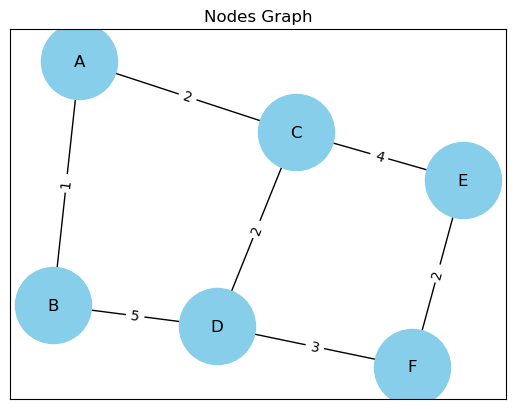

A* path: ['F']


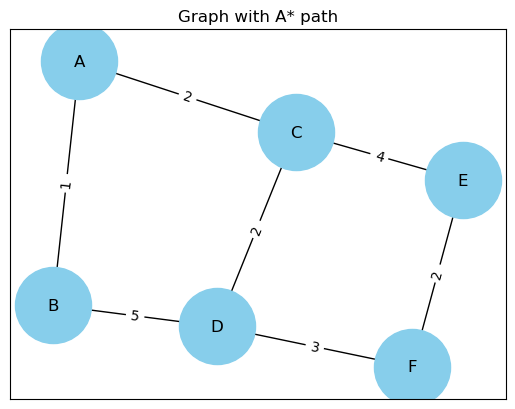

In [2]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

# Class representing a node in the graph


class Node:
    def __init__(self, name, heuristic_cost):
        self.name = name
        self.heuristic_cost = heuristic_cost
        self.adjacent = {}
        self.parent = None
        self.g_cost = float("inf")

    def add_neighbor(self, neighbor, cost):
        self.adjacent[neighbor] = cost

    def __lt__(self, other):
        return self.g_cost + self.heuristic_cost < other.g_cost + other.heuristic_cost


# A* search algorithm


def astar_search(start, goal):
    open_list = []
    closed_set = set()
    start.g_cost = 0
    heapq.heappush(open_list, start)

    while open_list:
        current_node = heapq.heappop(open_list)
        if current_node == goal:
            path = []
            while current_node is not None:
                path.append(current_node.name)
                current_node = current_node.parent
                return path[::-1]
        closed_set.add(current_node)

        for neighbor, cost in current_node.adjacent.items():
            tentative_g_cost = current_node.g_cost + cost
            if neighbor in closed_set and tentative_g_cost >= neighbor.g_cost:
                continue
            if tentative_g_cost < neighbor.g_cost or neighbor not in open_list:
                neighbor.g_cost = tentative_g_cost
                neighbor.parent = current_node
                if neighbor not in open_list:
                    heapq.heappush(open_list, neighbor)
    return None


# Creating nodes
A = Node("A", 5)
B = Node("B", 4)
C = Node("C", 3)
D = Node("D", 2)
E = Node("E", 1)
F = Node("F", 0)

# Adding neighbors and their costs
A.add_neighbor(B, 1)
A.add_neighbor(C, 2)
B.add_neighbor(D, 5)
C.add_neighbor(D, 2)
C.add_neighbor(E, 4)
D.add_neighbor(F, 3)
E.add_neighbor(F, 2)

# Visualization without the solution
G = nx.Graph()
edges = [
    (A.name, B.name, {"weight": 1}),
    (A.name, C.name, {"weight": 2}),
    (B.name, D.name, {"weight": 5}),
    (C.name, D.name, {"weight": 2}),
    (C.name, E.name, {"weight": 4}),
    (D.name, F.name, {"weight": 3}),
    (E.name, F.name, {"weight": 2}),
]
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color="skyblue")
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Nodes Graph")
plt.show()

# Running the A* search algorithm
path = astar_search(A, F)
print("A* path:", path)

# Visualization with A* path
plt.title("Graph with A* path")
nx.draw_networkx(G, pos, with_labels=True, node_size=3000, node_color="skyblue")
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(path[i], path[i + 1]) for i in range(len(path) - 1)],
    edge_color="r",
    width=2,
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [3]:
import random

# Number of individuals in each generation
POPULATION_SIZE = 4

# Valid genes
GENES = """01"""

# Target string to be generated
TARGET = "001010"


class Individual(object):
    # Class representing individual in population
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(self):
        # create random genes for mutation
        global GENES
        gene = random.choice(GENES)
        return gene

    @classmethod
    def create_gnome(self):
        # create chromosome or string of genes
        global TARGET
        gnome_len = len(TARGET)
        return [self.mutated_genes() for _ in range(gnome_len)]

    def mate(self, par2):
        # Perform mating and produce new offspring
        # Chromosome for offspring
        child_chromosome = []

        for gp1, gp2 in zip(self.chromosome, par2.chromosome):
            # random probability
            prob = random.random()

            # if prob is less than 0.45, insert gene from parent 1
            if prob < 0.45:
                child_chromosome.append(gp1)
            # if prob is between 0.45 and 0.90, insert gene from parent 2
            elif prob < 0.90:
                child_chromosome.append(gp2)
            # otherwise insert random gene(mutate) for maintaining diversity
            else:
                child_chromosome.append(self.mutated_genes())

        # create new Individual(offspring) using generated chromosome for offspring
        return Individual(child_chromosome)

    def cal_fitness(self):
        """Calculate fitness score, it is the number of characters in string which differ from target string."""
        global TARGET
        fitness = 0

        for gs, gt in zip(self.chromosome, TARGET):
            if gs != gt:
                fitness += 1
        return fitness


# Driver code
def main():
    global POPULATION_SIZE
    # current generation
    generation = 1
    found = False
    population = []

    # create initial population
    for _ in range(POPULATION_SIZE):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))
    while not found:
        # sort the population in increasing order of fitness score
        population = sorted(population, key=lambda x: x.fitness)

        # if the individual having lowest fitness score ie. 0 then we know that we have reached to the target and break the loop
        if population[0].fitness <= 0:
            found = True
            break

        # Otherwise generate new offsprings for new generation
        new_generation = []
        # Perform Elitism, that means 10% of fittest population goes to the next generation
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])
        # From 50% of fittest population, Individuals will mate to produce offspring
        s = int((90 * POPULATION_SIZE) / 100)

        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print(
            "Generation: {}\tString: {}\tFitness: {}".format(
                generation, "".join(population[0].chromosome), population[0].fitness
            )
        )

        generation += 1

    print(
        "Generation: {}\tString: {}\tFitness: {}".format(
            generation, "".join(population[0].chromosome), population[0].fitness
        )
    )


if __name__ == "__main__":
    main()

Generation: 1	String: 010011	Fitness: 3
Generation: 2	String: 010011	Fitness: 3
Generation: 3	String: 110011	Fitness: 4
Generation: 4	String: 000111	Fitness: 3
Generation: 5	String: 111110	Fitness: 3
Generation: 6	String: 111111	Fitness: 4
Generation: 7	String: 100110	Fitness: 3
Generation: 8	String: 110110	Fitness: 4
Generation: 9	String: 110111	Fitness: 5
Generation: 10	String: 110111	Fitness: 5
Generation: 11	String: 010110	Fitness: 3
Generation: 12	String: 010110	Fitness: 3
Generation: 13	String: 000010	Fitness: 1
Generation: 14	String: 110110	Fitness: 4
Generation: 15	String: 100010	Fitness: 2
Generation: 16	String: 110100	Fitness: 5
Generation: 17	String: 100000	Fitness: 3
Generation: 18	String: 100010	Fitness: 2
Generation: 19	String: 000000	Fitness: 2
Generation: 20	String: 000000	Fitness: 2
Generation: 21	String: 100000	Fitness: 3
Generation: 22	String: 001000	Fitness: 1
Generation: 23	String: 001001	Fitness: 2
Generation: 24	String: 001010	Fitness: 0
